In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
img = cv2.imread('./test_images/000005.png')
img.shape

(1024, 1024, 3)

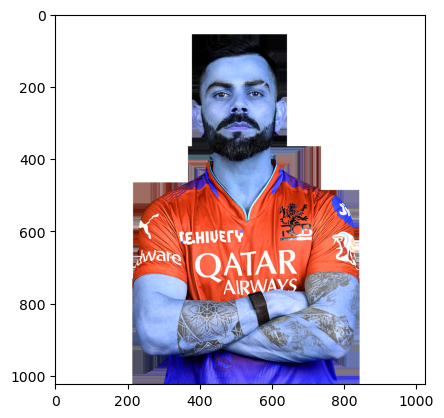

In [48]:
plt.imshow(img)

In [49]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1024, 1024)

In [50]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

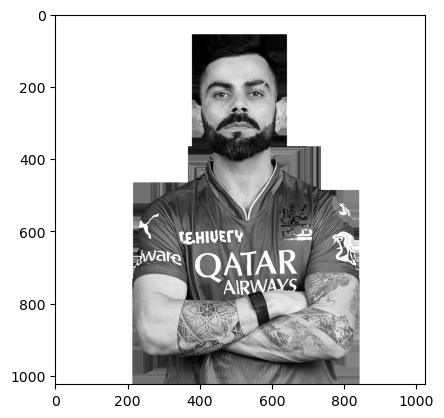

In [51]:
plt.imshow(gray , cmap='gray')

In [52]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray ,1.3,5)
faces

array([[370, 110, 269, 269]])

In [53]:
(x,y,w,h)=faces[0]
x,y,w,h

(370, 110, 269, 269)

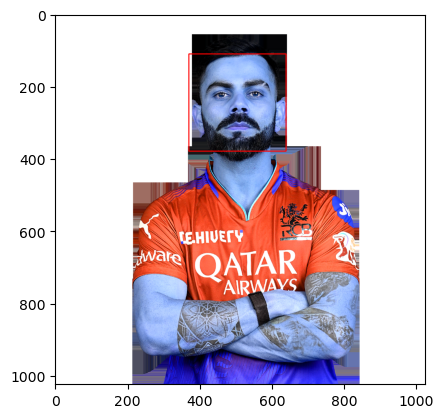

In [54]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

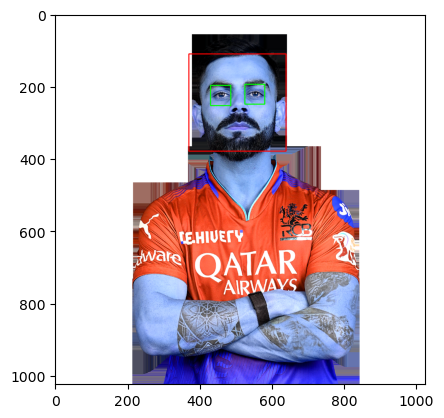

In [55]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

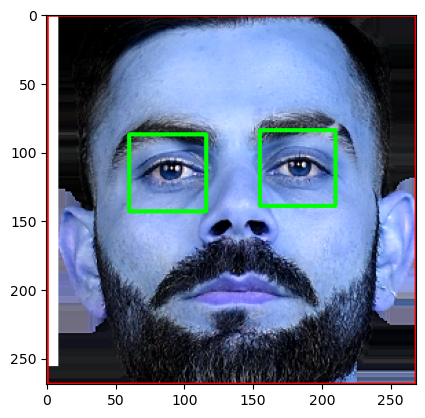

In [56]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [57]:
cropped_img = np.array(roi_color)
cropped_img.shape


(269, 269, 3)

In [58]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

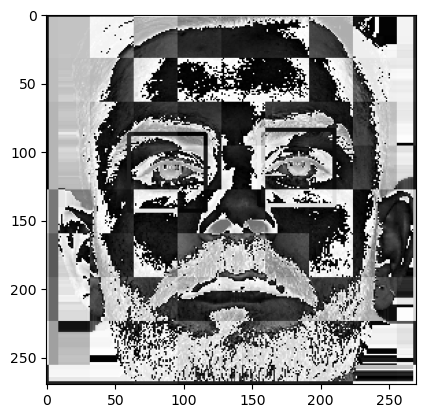

In [59]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [63]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

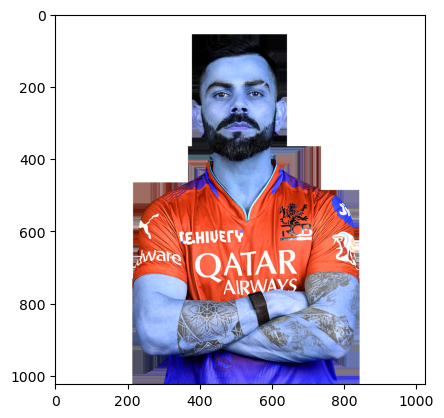

In [65]:
original_image = cv2.imread('./test_images/000005.png')
plt.imshow(original_image)

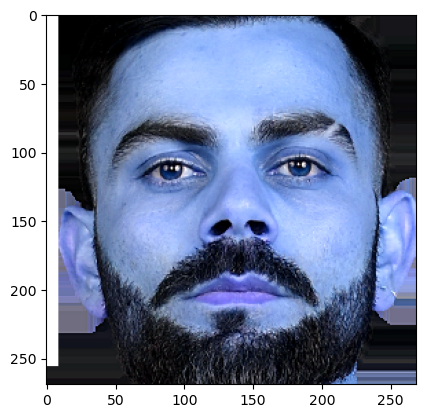

In [66]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/000005.png')
plt.imshow(cropped_image)

In [18]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./dataset/Cristiano_Ronaldo',
 './dataset/Dwayne_Wade',
 './dataset/Kapil_Dev',
 './dataset/Kobe_Bryant',
 './dataset/LeBron_James',
 './dataset/Lewis_Hamilton',
 './dataset/Lionel_Messi',
 './dataset/Maria_Sharapova',
 './dataset/Mary_Kom',
 './dataset/Michael_Jordan',
 './dataset/Mike_Tyson',
 './dataset/Milkha_Singh',
 './dataset/MS_Dhoni',
 './dataset/Neeraj_Chopra',
 './dataset/Neymar_Jr',
 './dataset/Novak_Djokovic',
 './dataset/PV_Sindhu',
 './dataset/Rafael_Nadal',
 './dataset/Roger_Federer',
 './dataset/Sachin_Tendulkar',
 './dataset/Saina_Nehwal',
 './dataset/Serena_Williams',
 "./dataset/Shaquille_O'Neal",
 './dataset/Stephen_Curry',
 './dataset/Sunil_Chhetri',
 './dataset/Tiger_Woods',
 './dataset/Tom_Brady',
 './dataset/Usain_Bolt',
 './dataset/Virat_Kohli']

In [21]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
import os
import cv2

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
    
    if not os.path.exists(cropped_folder):
        os.makedirs(cropped_folder)
        cropped_image_dirs.append(cropped_folder)
        print("Generating cropped images in folder:", cropped_folder)
    
    
    while len(celebrity_file_names_dict[celebrity_name]) < 50:
        count = len(celebrity_file_names_dict[celebrity_name]) + 1  
        for entry in os.scandir(img_dir):
            if len(celebrity_file_names_dict[celebrity_name]) >= 50:  
                break
            if entry.is_file() and entry.name.endswith(('.png', '.jpg', '.jpeg')):
                try:
                    roi_color = get_cropped_image_if_2_eyes(entry.path)
                    if roi_color is not None:
                        cropped_file_name = f"{celebrity_name}_{count}.png"
                        cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                        
                        
                        cv2.imwrite(cropped_file_path, roi_color)
                        celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                        count += 1
                except Exception as e:
                    print(f"Error processing image {entry.path}: {e}")
                    
    print(f"Total cropped images for {celebrity_name}: {len(celebrity_file_names_dict[celebrity_name])}")


Generating cropped images in folder: ./dataset/cropped/Cristiano_Ronaldo
Total cropped images for Cristiano_Ronaldo: 50
Generating cropped images in folder: ./dataset/cropped/Dwayne_Wade
Error processing image ./dataset/Dwayne_Wade\000048.jpg: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Error processing image ./dataset/Dwayne_Wade\000050.jpg: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Error processing image ./dataset/Dwayne_Wade\000048.jpg: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Error processing image ./dataset/Dwayne_Wade\000050.jpg: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-2

In [23]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Cristiano_Ronaldo': ['./dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo_1.png',
  './dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo_10.png',
  './dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo_11.png',
  './dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo_12.png',
  './dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo_13.png',
  './dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo_14.png',
  './dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo_15.png',
  './dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo_16.png',
  './dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo_17.png',
  './dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo_18.png',
  './dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo_19.png',
  './dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo_2.png',
  './dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo_20.png',
  './dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo_21.png',
  './dataset/cropped/Cristiano_Ronaldo\\Cri

In [24]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Cristiano_Ronaldo': 0,
 'Dwayne_Wade': 1,
 'Kapil_Dev': 2,
 'Kobe_Bryant': 3,
 'LeBron_James': 4,
 'Lewis_Hamilton': 5,
 'Lionel_Messi': 6,
 'Maria_Sharapova': 7,
 'Mary_Kom': 8,
 'Michael_Jordan': 9,
 'Mike_Tyson': 10,
 'Milkha_Singh': 11,
 'MS_Dhoni': 12,
 'Neeraj_Chopra': 13,
 'Neymar_Jr': 14,
 'Novak_Djokovic': 15,
 'PV_Sindhu': 16,
 'Rafael_Nadal': 17,
 'Roger_Federer': 18,
 'Sachin_Tendulkar': 19,
 'Saina_Nehwal': 20,
 'Serena_Williams': 21,
 "Shaquille_O'Neal": 22,
 'Stephen_Curry': 23,
 'Sunil_Chhetri': 24,
 'Tiger_Woods': 25,
 'Tom_Brady': 26,
 'Usain_Bolt': 27,
 'Virat_Kohli': 28}

In [25]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])    

In [26]:
len(X[0])

4096

In [27]:
X[0]

array([[28],
       [23],
       [55],
       ...,
       [ 5],
       [ 2],
       [ 0]], dtype=uint8)

In [28]:
y[0]


0

In [29]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(1450, 4096)

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8126721763085399

In [32]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        17
           1       0.64      0.69      0.67        13
           2       0.64      0.88      0.74         8
           3       1.00      1.00      1.00        11
           4       1.00      0.83      0.91        12
           5       0.83      0.83      0.83        12
           6       1.00      0.85      0.92        13
           7       0.35      0.75      0.48         8
           8       0.82      0.60      0.69        15
           9       1.00      1.00      1.00        17
          10       0.93      1.00      0.97        14
          11       0.92      0.86      0.89        14
          12       0.80      0.67      0.73        12
          13       0.54      1.00      0.70         7
          14       0.50      0.78      0.61         9
          15       0.92      0.85      0.88        13
          16       0.44      0.58      0.50        12
          17       0.92    

In [33]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [34]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [35]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_, 
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.763582,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.662364,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.750679,{'logisticregression__C': 1}


In [36]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [37]:
best_estimators['svm'].score(X_test,y_test)

0.8319559228650137

In [38]:
best_estimators['random_forest'].score(X_test,y_test)

0.7382920110192838

In [39]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8236914600550964

In [40]:
best_clf = best_estimators['svm']

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[11,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  2,  0,  0,  0,  3,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         2,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  

Text(95.72222222222221, 0.5, 'Truth')

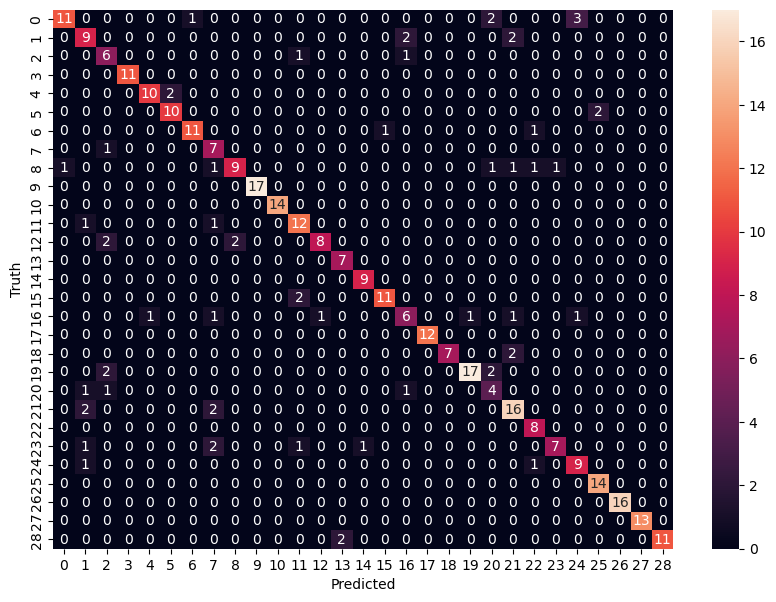

In [42]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
class_dict

{'Cristiano_Ronaldo': 0,
 'Dwayne_Wade': 1,
 'Kapil_Dev': 2,
 'Kobe_Bryant': 3,
 'LeBron_James': 4,
 'Lewis_Hamilton': 5,
 'Lionel_Messi': 6,
 'Maria_Sharapova': 7,
 'Mary_Kom': 8,
 'Michael_Jordan': 9,
 'Mike_Tyson': 10,
 'Milkha_Singh': 11,
 'MS_Dhoni': 12,
 'Neeraj_Chopra': 13,
 'Neymar_Jr': 14,
 'Novak_Djokovic': 15,
 'PV_Sindhu': 16,
 'Rafael_Nadal': 17,
 'Roger_Federer': 18,
 'Sachin_Tendulkar': 19,
 'Saina_Nehwal': 20,
 'Serena_Williams': 21,
 "Shaquille_O'Neal": 22,
 'Stephen_Curry': 23,
 'Sunil_Chhetri': 24,
 'Tiger_Woods': 25,
 'Tom_Brady': 26,
 'Usain_Bolt': 27,
 'Virat_Kohli': 28}

In [44]:
import joblib
# Saving the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [45]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))